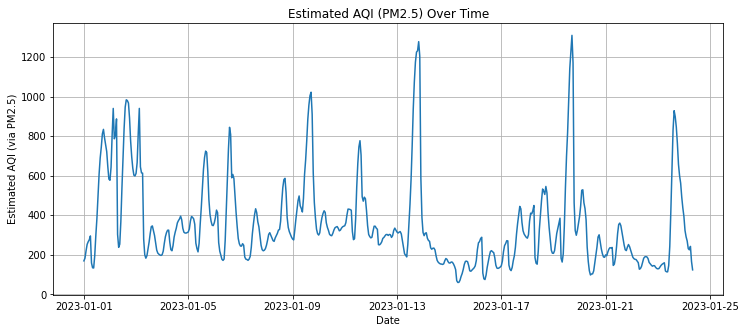

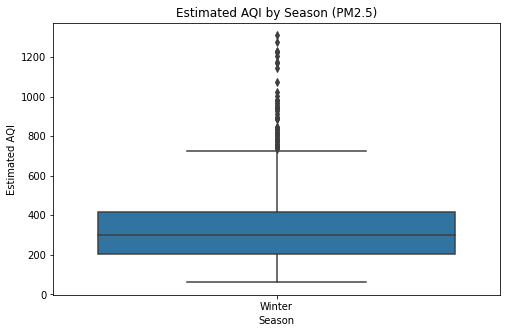

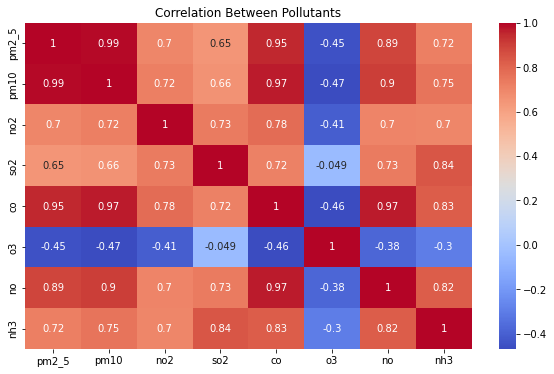

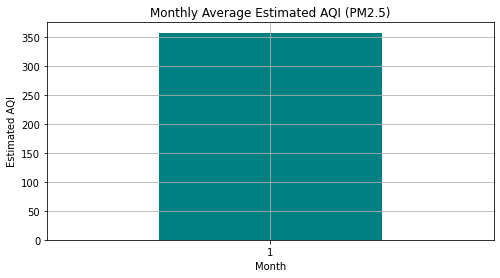

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("delhiaqi.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Convert date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Extract time features
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['season'] = df['month'] % 12 // 3 + 1
df['season'] = df['season'].map({1: 'Winter', 2: 'Summer', 3: 'Monsoon', 4: 'Post-Monsoon'})

# Create a proxy AQI using PM2.5
df['aqi_est'] = df['pm2_5']

# Plot AQI trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='aqi_est')
plt.title("Estimated AQI (PM2.5) Over Time")
plt.ylabel("Estimated AQI (via PM2.5)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# AQI by Season
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='aqi_est', data=df)
plt.title("Estimated AQI by Season (PM2.5)")
plt.ylabel("Estimated AQI")
plt.xlabel("Season")
plt.show()

# Correlation matrix
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'no', 'nh3']
existing_pollutants = [col for col in pollutants if col in df.columns]
corr = df[existing_pollutants].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show()

# Monthly trend
monthly_avg = df.groupby('month')['aqi_est'].mean()
plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='bar', color='teal')
plt.title("Monthly Average Estimated AQI (PM2.5)")
plt.ylabel("Estimated AQI")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
